In [1]:
%load_ext autoreload
%autoreload 2

import os
from collections import namedtuple

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import decomposition, preprocessing
from sklearn import manifold
import torch
from torch.distributions import Normal

plt.style.use("seaborn-v0_8")

In [2]:
food_name = os.path.join("/mnt/dl/machine_learning_dataset/food_ingredients/cleaned_ingredients.csv")

In [3]:
food_df = pd.read_csv(food_name)

In [4]:
food_df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.4,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


In [5]:
food_df.columns.tolist()

['NDB_No',
 'Descrip',
 'Energy_kcal',
 'Protein_g',
 'Saturated_fats_g',
 'Fat_g',
 'Carb_g',
 'Fiber_g',
 'Sugar_g',
 'Calcium_mg',
 'Iron_mg',
 'Magnesium_mg',
 'Phosphorus_mg',
 'Potassium_mg',
 'Sodium_mg',
 'Zinc_mg',
 'Copper_mcg',
 'Manganese_mg',
 'Selenium_mcg',
 'VitC_mg',
 'Thiamin_mg',
 'Riboflavin_mg',
 'Niacin_mg',
 'VitB6_mg',
 'Folate_mcg',
 'VitB12_mcg',
 'VitA_mcg',
 'VitE_mg',
 'VitD2_mcg']

In [6]:
df = food_df[food_df.columns[1:]].copy()
df = df[df["Magnesium_mg"] != 'X']
df.index = df['Descrip']
df = df.drop(columns=["Descrip"])
df

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
Descrip,,,,,,,,,,,,,,,,,,,,,
butter with salt,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,0.02,2,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
butter whipped w salt,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,0.05,1,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
butter oil anhydrous,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,0.00,0,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,0.31,23,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,0.43,24,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,1.04,26.53,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.4,0.0
crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,1.10,66.77,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,0.78,39.25,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0,0.0


In [7]:
features = df[df.columns[1:]]
features

,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
Descrip,,,,,,,,,,,,,,,,,,,,,
butter with salt,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,0.02,2,24.0,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
butter whipped w salt,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,0.05,1,24.0,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
butter oil anhydrous,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,0.00,0,3.0,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
cheese blue,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,0.31,23,387.0,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
cheese brick,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,0.43,24,451.0,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rohu,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,1.04,26.53,200.0,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.4,0.0
crab,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,1.10,66.77,208.0,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
prawns big,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,0.78,39.25,237.0,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9317 entries, butter with salt to tiger prawns
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Energy_kcal       9317 non-null   float64
 1   Protein_g         9317 non-null   float64
 2   Saturated_fats_g  9317 non-null   float64
 3   Fat_g             9317 non-null   float64
 4   Carb_g            9317 non-null   float64
 5   Fiber_g           9317 non-null   float64
 6   Sugar_g           9317 non-null   float64
 7   Calcium_mg        9317 non-null   float64
 8   Iron_mg           9317 non-null   float64
 9   Magnesium_mg      9317 non-null   object 
 10  Phosphorus_mg     9317 non-null   float64
 11  Potassium_mg      9317 non-null   float64
 12  Sodium_mg         9317 non-null   float64
 13  Zinc_mg           9317 non-null   float64
 14  Copper_mcg        9317 non-null   float64
 15  Manganese_mg      9317 non-null   float64
 16  Selenium_mcg      9317 n

In [9]:
# set(sorted(df["Magnesium_mg"].values))

In [10]:
# features = features[features["Magnesium_mg"] != 'X']

In [11]:
def modify_vitamin(x):
    if " " in x:
        val1, val2 = map(lambda x: float(x), x.split(" "))
        x = str((val1 + val2) / 2.0)
    
    return x
    
features["VitE_mg"] = features["VitE_mg"].apply(modify_vitamin)

/tmp/ipykernel_2561/2843897266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["VitE_mg"] = features["VitE_mg"].apply(modify_vitamin)


In [12]:
features = features.astype(float)

In [13]:
features

,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
Descrip,,,,,,,,,,,,,,,,,,,,,
butter with salt,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,0.02,2.00,24.0,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
butter whipped w salt,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,0.05,1.00,24.0,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
butter oil anhydrous,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,0.00,0.00,3.0,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.80,0.0
cheese blue,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,0.31,23.00,387.0,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
cheese brick,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,0.43,24.00,451.0,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rohu,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,1.04,26.53,200.0,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.40,0.0
crab,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,1.10,66.77,208.0,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
prawns big,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,0.78,39.25,237.0,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0.00,0.0


In [14]:
normalizer = preprocessing.StandardScaler()

In [15]:
normalizer.fit(features)

StandardScaler()

In [16]:
feat_scaled = pd.DataFrame(normalizer.transform(features), columns=features.columns, index=features.index)

In [17]:
feat_scaled

,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
Descrip,,,,,,,,,,,,,,,,,,,,,
butter with salt,-1.003167,7.630693,4.552522,-0.794389,-0.48283,-0.478909,-0.250511,-0.469640,-0.551611,-0.656065,...,-0.134628,-0.397099,-0.450723,-0.701312,-0.120179,-0.207771,-0.232157,0.792455,0.317895,-0.114488
butter whipped w salt,-1.037658,6.681586,4.372108,-0.690304,-0.48283,-0.478909,-0.255558,-0.464313,-0.569053,-0.656065,...,-0.134628,-0.393058,-0.380525,-0.705616,-0.119861,-0.201563,-0.256204,0.791123,0.103972,-0.114488
butter oil anhydrous,-1.057777,9.306634,5.731956,-0.796611,-0.48283,-0.483354,-0.351455,-0.473191,-0.586495,-0.761597,...,-0.134628,-0.405182,-0.518581,-0.709705,-0.120306,-0.226394,-0.270633,1.000275,0.425982,-0.114488
cheese blue,0.965662,2.439183,1.190142,-0.709936,-0.48283,-0.446308,2.293275,-0.418148,-0.185330,1.168135,...,-0.134628,-0.348604,0.363573,-0.491718,-0.109807,-0.002917,0.020342,0.145017,-0.148232,0.051959
cheese brick,1.141947,2.454266,1.250494,-0.693268,-0.48283,-0.445567,3.030166,-0.396841,-0.167889,1.489757,...,-0.134628,-0.378914,0.291035,-0.684958,-0.116234,-0.102240,0.029961,0.270241,-0.145980,0.051959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rohu,0.803749,-0.199836,-0.501643,-0.796611,-0.48283,-0.483354,-0.172936,-0.288530,-0.123760,0.228396,...,-0.134628,-0.407202,-0.436683,-0.208960,15.150770,7.613921,-0.273037,-0.118754,0.335909,-0.114488
crab,0.182921,-0.490855,-0.597949,-0.796611,-0.48283,-0.483354,0.632748,-0.277876,0.578103,0.268599,...,-0.134628,-0.386996,-0.272888,-0.378959,12.732839,10.841920,-0.273037,-0.118754,0.887605,-0.114488
prawns big,0.758720,-0.511041,-0.621705,-0.796611,-0.48283,-0.483354,-0.126602,-0.334695,0.098101,0.414334,...,-0.134628,-0.407202,-0.483482,-0.428453,11.714763,11.108851,-0.273037,-0.118754,-0.204528,-0.114488


In [18]:
feat_scaled.mean(0)

Protein_g          -3.050522e-17
Saturated_fats_g   -4.880835e-17
Fat_g               4.575782e-17
Carb_g              5.795991e-17
Fiber_g            -2.745469e-17
Sugar_g             2.135365e-17
Calcium_mg          7.626304e-18
Iron_mg             7.626304e-18
Magnesium_mg        6.101043e-18
Phosphorus_mg      -1.830313e-17
Potassium_mg        1.372735e-17
Sodium_mg           1.677787e-17
Zinc_mg            -6.101043e-18
Copper_mcg          3.660626e-17
Manganese_mg       -1.143946e-18
Selenium_mcg       -1.525261e-17
VitC_mg            -1.830313e-17
Thiamin_mg         -1.982839e-17
Riboflavin_mg       6.101043e-17
Niacin_mg          -7.321252e-17
VitB6_mg            0.000000e+00
Folate_mcg          0.000000e+00
VitB12_mcg         -3.050522e-18
VitA_mcg           -4.575782e-18
VitE_mg             3.050522e-18
VitD2_mcg          -2.592943e-17
dtype: float64

In [19]:
feat_scaled.std(0)

Protein_g           1.000054
Saturated_fats_g    1.000054
Fat_g               1.000054
Carb_g              1.000054
Fiber_g             1.000054
Sugar_g             1.000054
Calcium_mg          1.000054
Iron_mg             1.000054
Magnesium_mg        1.000054
Phosphorus_mg       1.000054
Potassium_mg        1.000054
Sodium_mg           1.000054
Zinc_mg             1.000054
Copper_mcg          1.000054
Manganese_mg        1.000054
Selenium_mcg        1.000054
VitC_mg             1.000054
Thiamin_mg          1.000054
Riboflavin_mg       1.000054
Niacin_mg           1.000054
VitB6_mg            1.000054
Folate_mcg          1.000054
VitB12_mcg          1.000054
VitA_mcg            1.000054
VitE_mg             1.000054
VitD2_mcg           1.000054
dtype: float64

In [20]:
pca_2 = decomposition.PCA(n_components=2)

In [21]:
pca_2.fit(feat_scaled)

PCA(n_components=2)

In [22]:
pca_2.transform(feat_scaled)

array([[-1.69954868,  1.04338413],
       [-1.69732602,  0.91710887],
       [-1.78150215,  1.26432055],
       ...,
       [ 0.51007867,  4.34244274],
       [-0.28097934,  3.66644683],
       [ 0.009994  ,  4.33224139]])

In [23]:
pca_2.components_

array([[ 0.19545991, -0.00263345,  0.02474921,  0.14294305,  0.20115425,
         0.04155181,  0.20828731,  0.30762949,  0.29240267,  0.26488562,
         0.22665224,  0.03150936,  0.26602684,  0.23920778,  0.12443489,
         0.12714119,  0.07178843,  0.26172835,  0.34248495,  0.32994023,
         0.01086866,  0.06621926,  0.20994678,  0.16754091,  0.10846187,
         0.06811964],
       [ 0.34943651,  0.05805979,  0.05626324, -0.46601416, -0.32037099,
        -0.35571142, -0.17406251, -0.15774954, -0.16508511,  0.04888767,
        -0.08363278, -0.05733739,  0.14480409,  0.16548022,  0.046084  ,
         0.2582843 , -0.08721443, -0.10839105,  0.0223079 ,  0.05152027,
         0.14750605,  0.13315905,  0.31675566,  0.21303902, -0.05072105,
         0.04936894]])

In [24]:
feat_scaled.shape

(9317, 26)

In [25]:
# x = W*z  --- N * D = (N * L) * (L * D)
# D = 26, L = 2, N = 9317

In [26]:
pca_2.components_.shape # W.T

(2, 26)

In [27]:
pca_2.components_ @ pca_2.components_.T

array([[ 1.00000000e+00, -8.11432273e-17],
       [-8.11432273e-17,  1.00000000e+00]])

In [28]:
pca_2.singular_values_

array([208.47931468, 152.45915368])

In [29]:
z_components = pca_2.transform(feat_scaled)

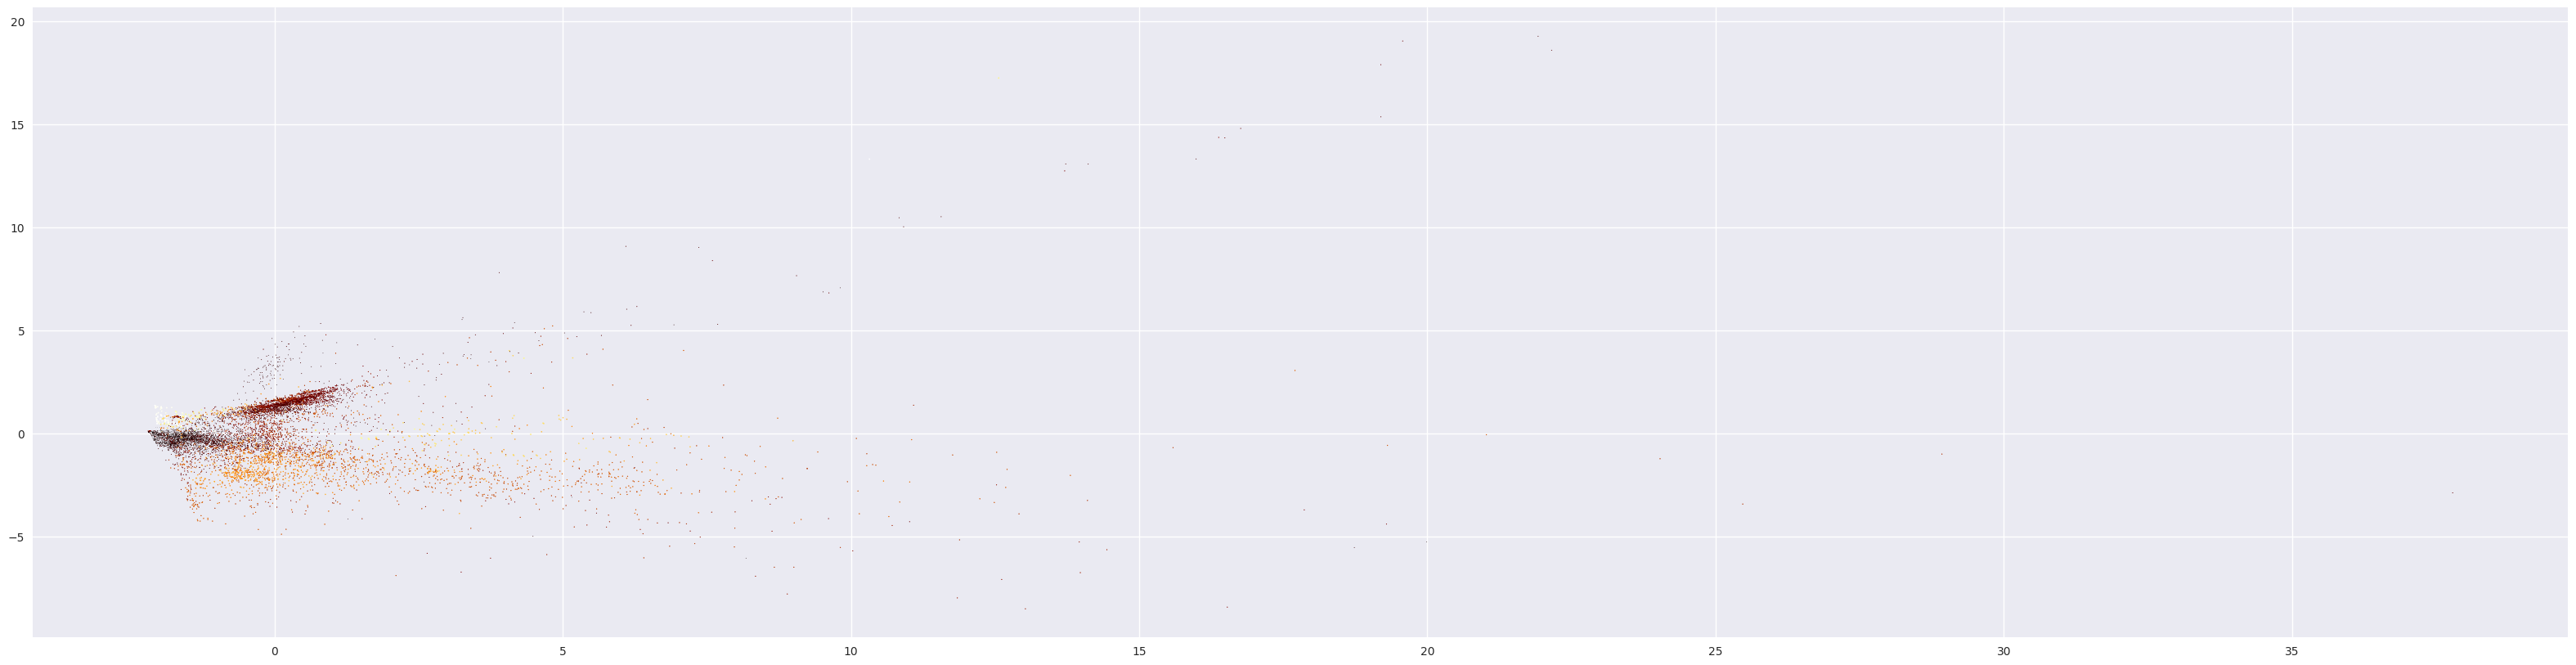

In [30]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.scatter(z_components[:, 0], z_components[:, 1], s=df["Energy_kcal"] / df["Energy_kcal"].max(), c=df["Energy_kcal"] / df["Energy_kcal"].max(),
           cmap=plt.cm.afmhot
           )

In [31]:
z_components[0]

array([-1.69954868,  1.04338413])

In [32]:
z_components

array([[-1.69954868,  1.04338413],
       [-1.69732602,  0.91710887],
       [-1.78150215,  1.26432055],
       ...,
       [ 0.51007867,  4.34244274],
       [-0.28097934,  3.66644683],
       [ 0.009994  ,  4.33224139]])

## fraction of variance explained

In [33]:
scores = {}
for n in [2, 3, 4, 5, 7, 9, 10, 15, 20, 25, features.shape[1]]:
    pca = decomposition.PCA(n_components=n).fit(features)
    scores[n] = pca.singular_values_.sum()
    

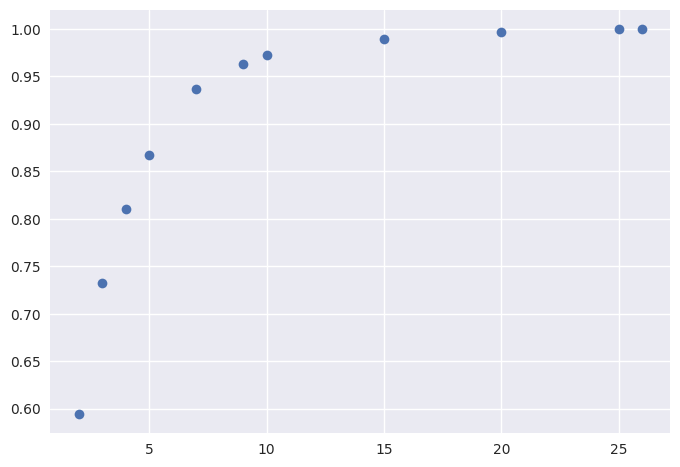

In [34]:
fig, ax = plt.subplots()
ax.plot(scores.keys(), [x / scores[features.shape[1]] for x in scores.values()], "o")

## Profile Likehood

In [35]:
ks = np.linspace(1, features.shape[1], 10).astype(int)
ks

array([ 1,  3,  6,  9, 12, 14, 17, 20, 23, 26])

In [36]:
pcas = {i: decomposition.PCA(i) for i in ks}

In [37]:
[pca.fit(feat_scaled) for _, pca in pcas.items()]

[PCA(n_components=1),
 PCA(n_components=3),
 PCA(n_components=6),
 PCA(n_components=9),
 PCA(n_components=12),
 PCA(n_components=14),
 PCA(n_components=17),
 PCA(n_components=20),
 PCA(n_components=23),
 PCA(n_components=26)]

In [38]:
eigenvals = [pca.singular_values_ for _, pca in pcas.items()][-1]

In [39]:
eigenvals

array([208.47931468, 152.45915706, 138.80423291, 134.89174026,
       128.22198417, 121.44846961, 106.09364886, 101.29230182,
        96.73855564,  95.05679245,  90.16987221,  89.59379205,
        88.11872795,  80.55331953,  79.48278582,  70.29259867,
        64.57001334,  60.82601164,  54.65472217,  51.97183139,
        51.4505367 ,  44.39564867,  43.47184864,  42.94597554,
        41.90208243,  40.44877399])

In [40]:
μ1 = eigenvals.cumsum() / np.arange(1, 1 + eigenvals.shape[0])

In [41]:
μ1 = μ1[:-1]
μ1

array([208.47931468, 180.46923587, 166.58090155, 158.65861123,
       152.57128582, 147.38414978, 141.48550679, 136.46135617,
       132.04771167, 128.34861975, 124.87782452, 121.93748848,
       119.33604536, 116.56585066, 114.09364633, 111.35608086,
       108.60395924, 105.94962882, 103.24989689, 100.68599361,
        98.34144804,  95.88936626,  93.61034375,  91.49932841,
        89.51543857])

In [42]:
μ2 = np.flip(np.flip(eigenvals[1:]).cumsum()) 
μ2 /= (eigenvals.shape[0] - np.arange(1, eigenvals.shape[0]))
μ2

array([82.79421694, 79.8915111 , 77.33008842, 74.7136497 , 72.16563377,
       69.70149198, 67.7861153 , 65.92466049, 64.11207842, 62.1780338 ,
       60.31191124, 58.22034832, 55.92047296, 53.86773575, 51.53909483,
       49.66374445, 48.00749235, 46.40517744, 45.22667105, 44.10247766,
       42.63286585, 42.19217015, 41.76561065, 41.17542821, 40.44877399])

In [43]:
# eigenvals2 = np.flip(np.flip(eigenvals[1:]).cumsum())
diff = np.square(eigenvals[1:] - μ2)
diff = np.flip(diff)
diff = diff.cumsum()
sigma = np.flip(diff)
sigma += np.square(eigenvals[:-1]).cumsum() + np.square(μ1) * np.arange(1, eigenvals.shape[0]) - 2 * eigenvals[:-1].cumsum() * μ1 
sigma /= eigenvals.shape[0]
sigma = np.sqrt(sigma) 
sigma

array([31.61884265, 29.55402916, 28.00828368, 26.19150718, 24.58410995,
       23.28108634, 23.39394397, 23.63185957, 23.99772976, 24.21624284,
       24.6425601 , 24.86303827, 24.98788579, 25.58856591, 26.05577474,
       27.1026666 , 28.37685695, 29.69589175, 31.22660701, 32.70209146,
       34.00214807, 35.53684992, 36.93083876, 38.1896028 , 39.36053917])

In [44]:
n1 = Normal(torch.from_numpy(μ1).float(), torch.from_numpy(sigma).float())

In [45]:
L = eigenvals.shape[0] - 1 
L

25

In [46]:
scores = {}
for l in range(L):
    dist1 =  Normal(torch.tensor(μ1[l]).float(), torch.tensor(sigma[l]).float())
    dist2 =  Normal(torch.tensor(μ2[l]).float(), torch.tensor(sigma[l]).float())
    scores[l] = dist1.log_prob(torch.from_numpy(eigenvals[0:l+1])).sum() + dist2.log_prob(torch.from_numpy(eigenvals[l+1:L])).sum()
     

In [47]:
scores

{0: tensor(-122.1271, dtype=torch.float64),
 1: tensor(-120.4314, dtype=torch.float64),
 2: tensor(-119.0944, dtype=torch.float64),
 3: tensor(-117.4162, dtype=torch.float64),
 4: tensor(-115.8330, dtype=torch.float64),
 5: tensor(-114.4759, dtype=torch.float64),
 6: tensor(-114.6340, dtype=torch.float64),
 7: tensor(-114.9221, dtype=torch.float64),
 8: tensor(-115.3386, dtype=torch.float64),
 9: tensor(-115.5905, dtype=torch.float64),
 10: tensor(-116.0497, dtype=torch.float64),
 11: tensor(-116.2871, dtype=torch.float64),
 12: tensor(-116.4187, dtype=torch.float64),
 13: tensor(-117.0199, dtype=torch.float64),
 14: tensor(-117.4706, dtype=torch.float64),
 15: tensor(-118.4581, dtype=torch.float64),
 16: tensor(-119.6091, dtype=torch.float64),
 17: tensor(-120.7459, dtype=torch.float64),
 18: tensor(-122.0043, dtype=torch.float64),
 19: tensor(-123.1594, dtype=torch.float64),
 20: tensor(-124.1331, dtype=torch.float64),
 21: tensor(-125.2372, dtype=torch.float64),
 22: tensor(-126.199

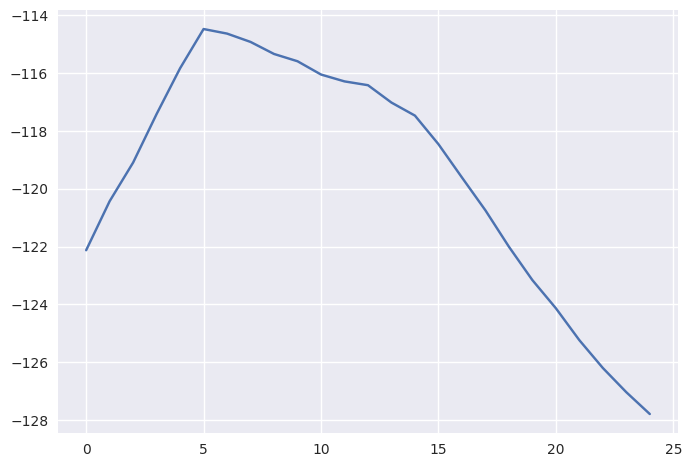

In [48]:
fig, ax = plt.subplots()
ax.plot(scores.keys(), scores.values())

## Factor Analysis

In [49]:
fpca = decomposition.FactorAnalysis(5)
fpca.fit_transform(feat_scaled)

array([[ 4.40276847, -2.42888345,  0.72276239,  0.0956669 ,  0.97485173],
       [ 4.12075016, -2.300725  ,  0.68792255,  0.06455911,  0.98862085],
       [ 5.55115942, -2.89235619,  0.82018218,  0.11581071,  1.17335763],
       ...,
       [-0.65679556,  0.05809457,  0.26472831, -0.74207999, -1.84225382],
       [-0.73367701, -0.18566754,  0.2213874 , -0.42823958, -1.38154543],
       [-0.72795631, -0.08693937,  0.32050707, -0.53111099, -1.52100287]])

In [50]:
fpca.components_

array([[ 0.21531237,  0.73782462,  0.90530451,  0.03807051,  0.0835954 ,
         0.02903438,  0.13991631,  0.16647809,  0.25789498,  0.23989095,
         0.09670715,  0.02955547,  0.22514294,  0.20782145,  0.07778052,
         0.12133659, -0.0101884 ,  0.18772351,  0.23816222,  0.24367156,
        -0.05162236, -0.02316361,  0.15062065,  0.152095  ,  0.32108297,
         0.11611985],
       [ 0.34338165, -0.29748236, -0.31058478,  0.270045  ,  0.31138692,
         0.07108505,  0.28117877,  0.57868645,  0.44310007,  0.37990159,
         0.36037663,  0.03768888,  0.47802876,  0.42191467,  0.204251  ,
         0.20384722,  0.17384743,  0.57244398,  0.79044288,  0.75515128,
         0.01577408,  0.11308586,  0.459324  ,  0.35122896,  0.08250632,
         0.10294539],
       [ 0.16356154,  0.04757276, -0.00486171, -0.48811535, -0.54632713,
        -0.24608554, -0.29127883, -0.24977314, -0.54237545, -0.18441216,
        -0.3239697 , -0.04091297,  0.0448672 ,  0.2195719 ,  0.08690154,
       

## Kernel PCA

In [51]:
kpca = decomposition.KernelPCA(2, kernel="rbf")

In [52]:
kpca.fit(feat_scaled)

KernelPCA(kernel='rbf', n_components=2)

In [53]:
kpca.transform(feat_scaled)

array([[0.51494513, 0.35979367],
       [0.50684134, 0.35117394],
       [0.51383264, 0.3659627 ],
       ...,
       [0.50436403, 0.36205889],
       [0.50671105, 0.36404198],
       [0.4996391 , 0.35805402]])

In [54]:
lle = manifold.LocallyLinearEmbedding(n_neighbors=3, n_components=2,  eigen_solver='dense')

In [55]:
lle.fit(feat_scaled)

LocallyLinearEmbedding(eigen_solver='dense', n_neighbors=3)

In [56]:
lle.transform(feat_scaled)

array([[-3.69401824e-03,  1.47328167e-02],
       [-3.69401824e-03,  1.47328167e-02],
       [-2.39253295e-03,  1.28210831e-02],
       ...,
       [ 1.71920611e-05,  9.29099086e-06],
       [ 1.71920611e-05,  9.29099086e-06],
       [ 1.71920611e-05,  9.29099086e-06]])

In [57]:
isopca = manifold.Isomap(n_components=2, n_neighbors=5)

In [58]:
z_components = isopca.fit_transform(feat_scaled)

/env_nlp/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/env_nlp/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/env_nlp/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/env_nlp/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/env_nlp/lib/python3.9/site-packages/scipy/sparse/_

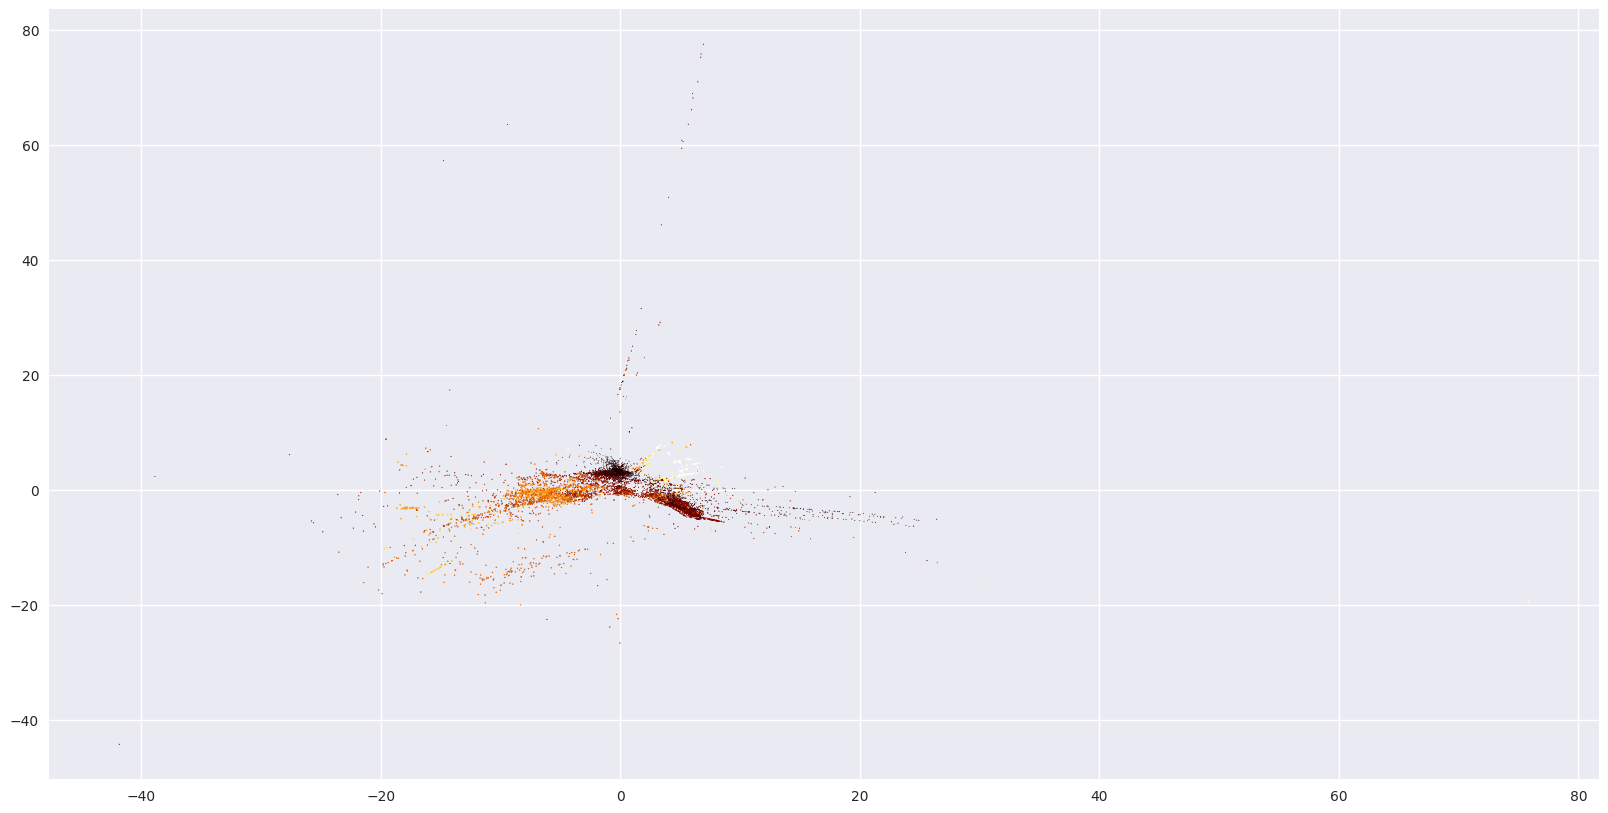

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(z_components[:, 0], z_components[:, 1], s=df["Energy_kcal"] / df["Energy_kcal"].max(), c=df["Energy_kcal"] / df["Energy_kcal"].max(),
           cmap=plt.cm.afmhot
           )

In [60]:
tpca = manifold.TSNE(2)

In [61]:
z_components = tpca.fit_transform(feat_scaled)

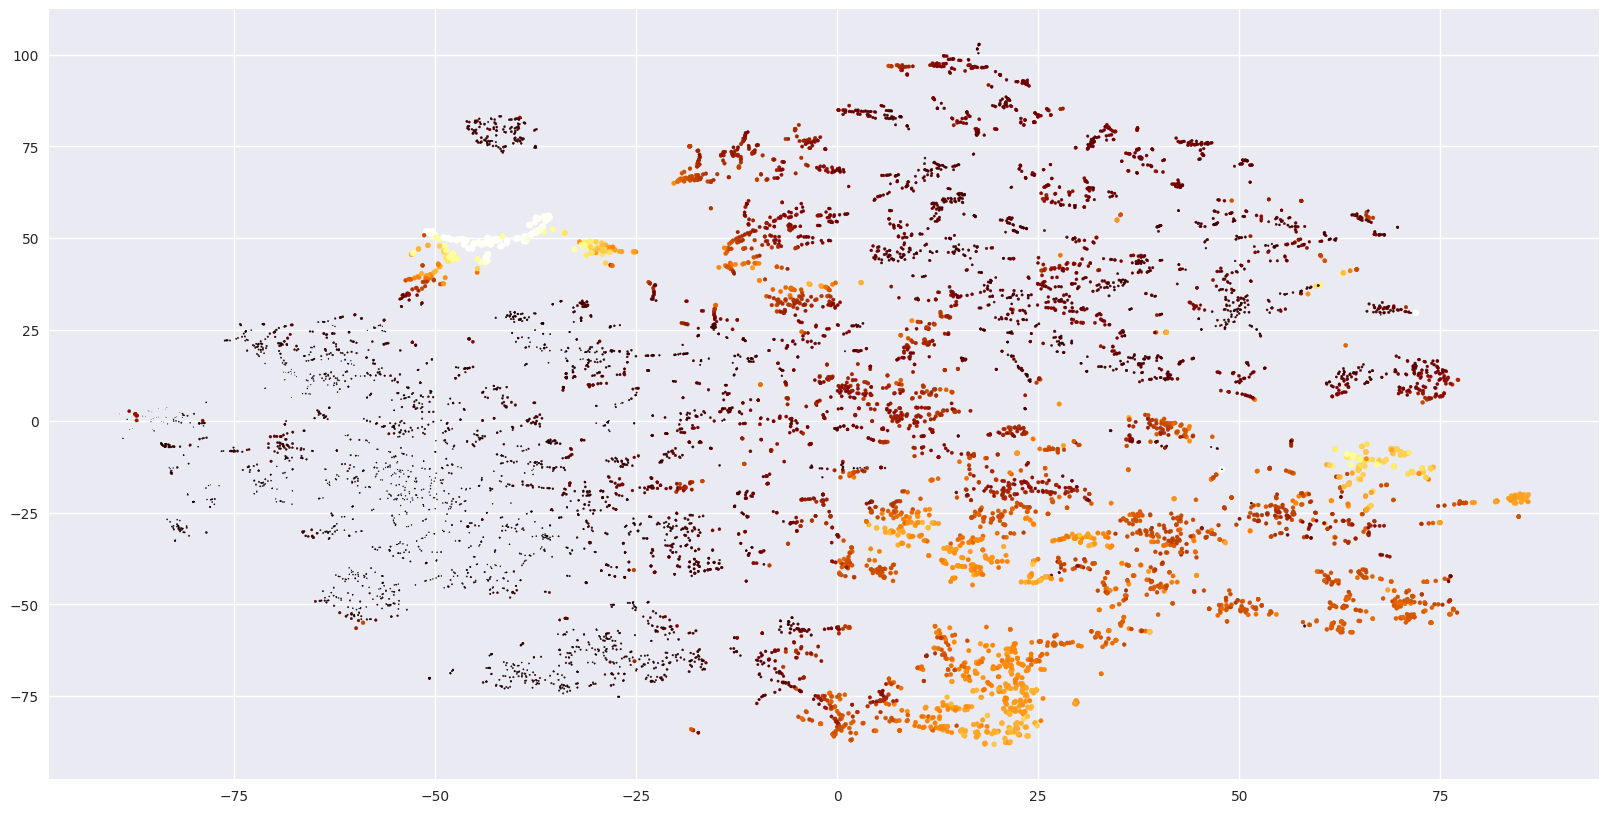

In [62]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(z_components[:, 0], z_components[:, 1], s=df["Energy_kcal"] * 20/ df["Energy_kcal"].max(), c=df["Energy_kcal"] / df["Energy_kcal"].max(),
           cmap=plt.cm.afmhot
           )